In [71]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])

In [72]:
df['job_skills'].isna().sum()


np.int64(117037)

In [73]:
print(df['job_skills'].dropna().head(10))


1     ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2     ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3     ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4     ['bash', 'python', 'oracle', 'aws', 'ansible',...
5                              ['python', 'sql', 'gcp']
6     ['sql', 'python', 'java', 'sql server', 'gcp',...
7     ['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...
8                   ['excel', 'powerpoint', 'power bi']
9     ['sql', 'python', 'r', 'mongodb', 'mongodb', '...
10           ['python', 'databricks', 'azure', 'spark']
Name: job_skills, dtype: object


In [74]:
df = df.dropna(subset=['job_skills'])
df['job_skills'] = df['job_skills'].str.split(',')   # if comma-separated
df_exploded = df.explode('job_skills')
df['job_skills'] = df['job_skills'].str.strip()
df_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,['r',"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'python',"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'sql',"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'nosql',"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,'power bi',"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,'kafka',"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,'kubernetes',"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,'docker'],"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,['aws',"{'cloud': ['aws'], 'other': ['flow']}"


In [80]:
df_DA= df_exploded[df['job_title_short']== 'Data Analyst'].copy()
df_DA['job_posted_month_no']= df_DA['job_posted_date'].dt.month

df_DA.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

C:\Users\Bluepal\AppData\Local\Temp\ipykernel_3908\3766249930.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_DA= df_exploded[df['job_title_short']== 'Data Analyst'].copy()


job_skills,'airflow','airflow'],'airtable','airtable'],'alteryx','alteryx'],'angular','angular'],'angular.js','ansible',...,['webex'],['windows',['windows'],['wire',['wire'],['word',['word'],['workfront'],['zoom',['zoom']
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,175,20,4,12,324,196,51,5,2,13,...,0,55,13,0,0,253,52,0,0,40
2,157,11,0,2,272,155,27,8,0,8,...,2,39,11,0,0,160,40,0,1,3
3,168,13,1,2,255,168,29,4,0,15,...,0,33,22,0,1,134,27,0,0,5
4,135,17,1,2,236,160,19,3,0,7,...,3,19,18,0,1,123,50,0,1,5
5,113,15,0,8,177,116,26,4,0,12,...,3,17,13,0,0,108,22,1,0,2
6,147,17,0,9,246,128,18,10,0,11,...,4,28,10,0,1,141,31,0,1,4
7,185,21,0,4,202,138,11,4,0,5,...,2,28,10,0,1,131,25,0,0,1
8,173,22,0,3,238,148,16,4,0,5,...,3,39,11,0,0,148,44,0,0,2
9,104,13,1,3,175,115,18,3,0,9,...,0,35,11,0,3,117,26,0,0,1


In [76]:
df_DA_pivot.loc['total']= df_DA_pivot.sum()

df_DA_pivot= df_DA_pivot[df_DA_pivot.loc['total'].sort_values(ascending=False).index]
df_DA_pivot= df_DA_pivot.drop('total')
df_DA_pivot

job_skills,['sql','python','excel','tableau','r','excel'],'sas','sql','power bi','tableau'],...,['gitlab','qt'],'chainer',['kali','centos'],'suse',['kubernetes',['elixir'],['docker',['redhat'
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,8001,4243,3726,2771,2608,2509,2849,2451,2159,2439,...,0,0,0,0,0,0,0,1,0,0
2,5698,3022,2625,2016,1847,1817,1946,1645,1659,1636,...,0,0,0,0,0,0,0,0,0,0
3,5562,2990,2559,2104,1892,1843,1923,1649,1580,1686,...,0,0,0,0,1,1,1,0,0,0
4,5340,2855,2461,2007,1718,1844,1946,1644,1562,1540,...,1,0,0,0,0,0,0,0,1,0
5,4758,2658,2147,1741,1507,1545,1421,1396,1343,1326,...,0,0,0,0,0,0,0,0,0,0
6,5345,2898,2535,2087,1717,1855,1607,1675,1598,1494,...,0,0,0,0,0,0,0,0,0,0
7,5393,3059,2456,2098,1798,1775,1566,1711,1579,1572,...,0,1,0,0,0,0,0,0,0,0
8,6225,3511,2937,2465,2224,2016,1922,1951,1860,1775,...,0,0,0,0,0,0,0,0,0,0
9,4865,2568,2196,1916,1627,1508,1424,1434,1414,1329,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

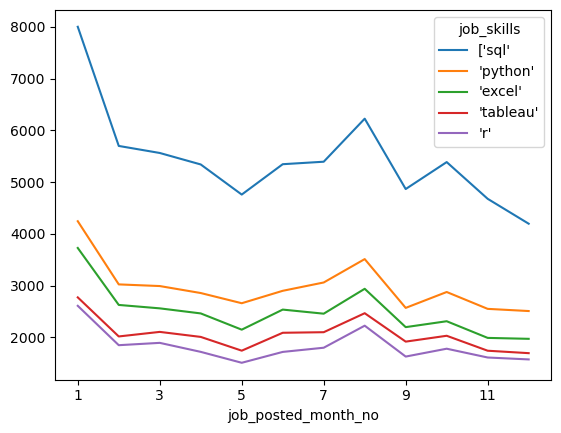

In [77]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

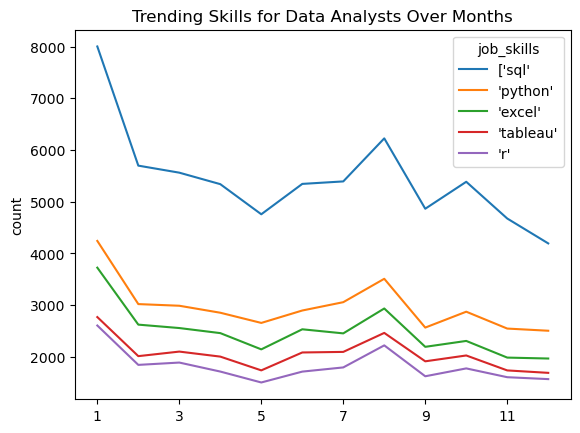

In [78]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Skills for Data Analysts Over Months')
plt.xlabel('')
plt.ylabel('count')
plt.show()